1. Guarde en un vector  la señal o un canal del audio disponible en la carpeta correspondiente según inicial de su apellido que se encuentra en el siguiente link. Calcule
- la cantidad de muestras de la señal ✅
- la frecuencia de muestreo ✅
- la duración en segundos de la señal. ✅

2. Grafique la señal en funcion del tiempo. ✅
3. Realice un analisis de la señal según las frecuencias (en Hertz). Justifique y expláyese, qué tecnica utiliza y por qué. ✅

4. Realice un analisis detallado de la señal según tiempo y frecuencia (en Hertz), expláyese, ¿Considera que la señal es estacionaria?, justifique claramente. Para el análisis utilice dos resoluciones diferentes (adecuadas ambas o por lo menos una). compárelas y cotéjelas. Son coherentes? por qué? considera que una es más adecuada que la otra para el problema? ✅

In [59]:
# se importan librerias necesarias
import numpy as np 
from scipy.io.wavfile import read, write  #para leer y guardar archivos de audio formato wav
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift
from scipy import signal
import pywt

# se carga el archivo en una variable
file = read('audioRec.wav')
# se muestra por consola la variable obtenida
# print(file)

# se obtiene la cantidad de muestras de la senal
freq = file[0]
print("Frecuencia de muestreo:  ", freq, "Hz")

# senal de audio -> descompongo el vector para quedarme con la senal de audio en cuestion
A = file[1]
# print(A)

# Se calcula la cantidada de muestras
M = len(A)
print("Cantidad de muestras:    ", M)

# por regla de tres simple, se saca la duracion del audio:
# 10.000 muestras ----------> 1s
# 60.000 muestras ----------> x = duracion
time = M/freq
print("Tiempo (duracion):       ", time, "s")

# se define la variable de periodo de meustreo para uso posterior
Pm = 1/freq 

Frecuencia de muestreo:   10000 Hz
Cantidad de muestras:     60000
Tiempo (duracion):        6.0 s


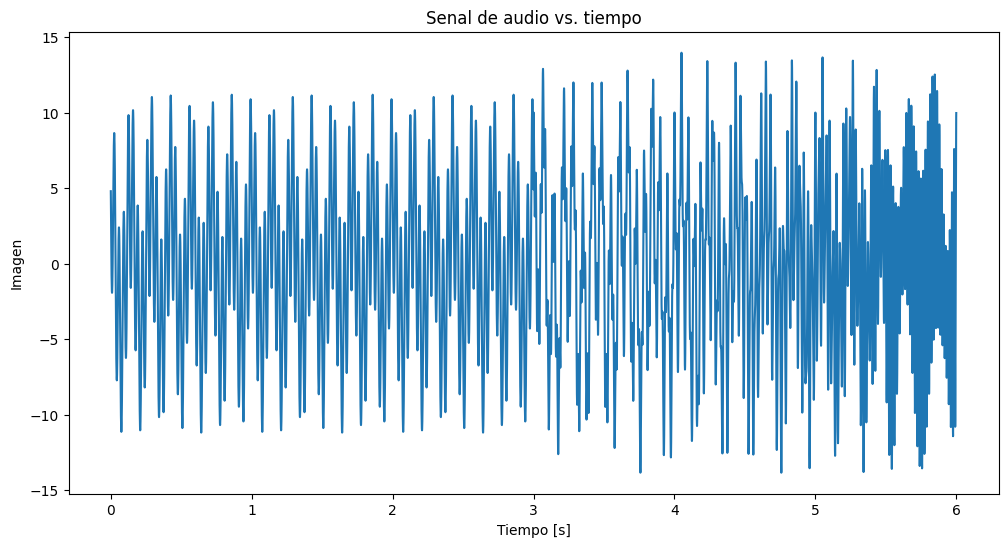

In [60]:
# se genera el vector de tiempos discretizados
tn = np.arange(0,6,Pm)

# se procede a graficar a la senal en funcion del tiempo
plt.figure(figsize=(12,6))
plt.plot(tn,A)
plt.xlabel("Tiempo [s]")
plt.ylabel("Imagen")
plt.title("Senal de audio vs. tiempo")
plt.show()


Se procede a analizar la senal de audio segun la frecuencia. Para tal fin, se va utilizar STFT dado que con esta herramienta puedo analizar senales no estacionarias. 

Considero que la senal de la figura es no estacionaria, dado que hay periodos donde se observa una oscilacion mas rapido que en otros. Por ejemplo, se ve claramente que en los segundos finales (5.5 a 6 segundos) la senal oscila mucho mas rapido que en tiempos iniciales (como por ejemplo del 0 al 1s).

Se analizara la senal con dos ventanas distintas para verificar correctamente el comportamiento en frecuencia:

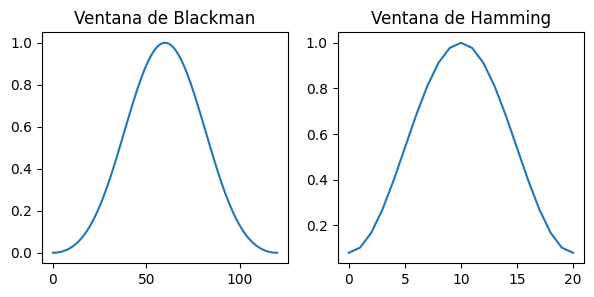

In [61]:
# se crean las ventanas de Blackman y de Hamming
window1 = signal.blackman(121)
window2 = signal.hamming(21)

# se procede a graficar las ventanas
plt.figure(figsize=(7,3))

plt.subplot(121)
plt.plot(window1)
plt.title("Ventana de Blackman")

plt.subplot(122)
plt.plot(window2)
plt.title("Ventana de Hamming")

plt.show()

In [62]:
# se calcula la short time fourier transform para la senal usando las distintas ventanas
f1, t1, Sxx1 = signal.spectrogram(A,fs=freq, window=window1, nfft=None, noverlap=None) # usando Blackman
f2, t2, Sxx2 = signal.spectrogram(A,fs=freq, window=window2,nfft=None, noverlap=None) # usando Hamming

Se realiza un espectrograma para visualizar:

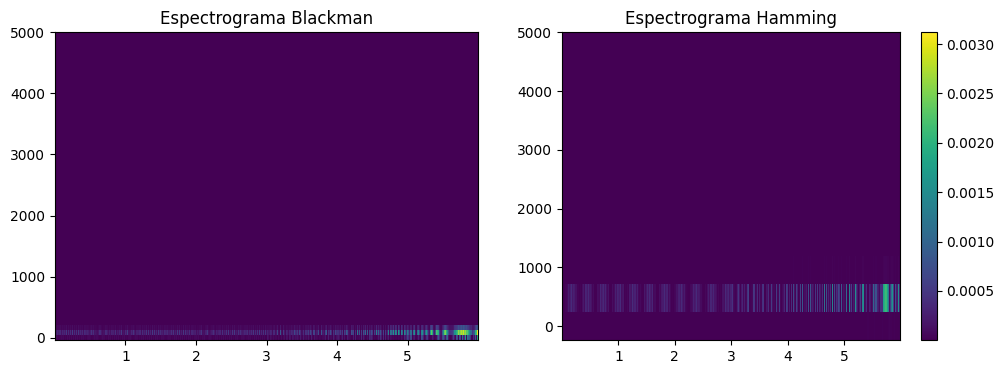

In [63]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.title("Espectrograma Blackman")
plt.pcolormesh(t1,f1,Sxx1)

plt.subplot(122)
plt.title("Espectrograma Hamming")
plt.pcolormesh(t2,f2,Sxx2)

plt.colorbar()
plt.show()

Se procede a realizar una conversion a decibeles, usdando: $dB = 20 \cdot log_{10}(1+|Sxx_n|)$

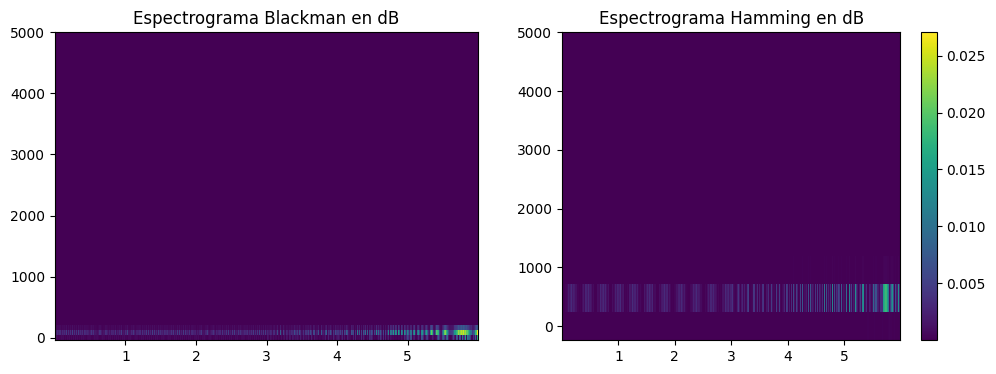

In [64]:
# se convierte a dB
dbSxx1 = 20*np.log10(1+abs(Sxx1))
dbSxx2 = 20*np.log10(1+abs(Sxx2))

# se plotea nuevamente
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.title("Espectrograma Blackman en dB")
plt.pcolormesh(t1,f1,dbSxx1)

plt.subplot(122)
plt.title("Espectrograma Hamming en dB")
plt.pcolormesh(t2,f2,dbSxx2)

plt.colorbar()
plt.show()

## **Conclusiones**
---
Con el uso del espectrograma, de la mano de la STFT, se puede observar que la senal de audio es estacionaria (contrario a la hipotesis que plantee al principio) dado que, a pesar de que la banda frecuencial no es continua, se ve que se mantiene horizontal y a la misma altura para los distintos intervalos de tiempo. Esto significa, que no hay cambios en el comportamiento frecuencial de la senal. 

A modo de ejemplo, el histograma de una senal no estacionaria se veria con "saltos" entre distintos valores de frecuencia. Como en este caso los histogramas no se presentan con saltos en el eje frecuencial, se concluye que se trata de una senal estacionaria.

Para encarar este problema, se utilizaron dos ventanas de distintas resoluciones. 
- Ventana de Blackman con un tamano de 121
- Ventana de Hamming con un tamano de 21

Con el objetivo de tener diferentes histogramas con distintas resoluciones, se concluye: 

La ventana de Hamming con un menor tamano en el tiempo (menor $\Delta t$) genero un espectrograma con mejor resolucion temporal, sin embargo, la resolucion frecuencial ($\Delta \omega$) fue comprometida para obtener una mejor resolucion temporal. Por ese motivo, al pasar a escala en $dB$ se ve la banda frecuencial mas ancha en la ventana de Hamming.

La ventana de Blackman con un tamano mayor en el dominio temporal (mayor $\Delta t$), mostro tener una resolucion temporal mas pobre que la anterior pero, al tener un $\Delta \omega$ mas chico, mejoro la resolucion frecuencial. Por este motivo se logran ver mas detalles en las bandas de frecuencia. Mientras que en el espectrograma de Hamming se ven tiras horizontales paralelas continuas con una sola intensidad, en el espectrograma de Blackman se ven las mismas bandas temporales (mas pequenas, dado que sacrificamos resolucion temporal al mejorar la frecuencial) pero con intensidad variada.

Ambas formas son coherentes, dado que muestran esencialmente la misma informacion. Sin embargo, creo que para resolver este problema, donde se pide analizar la estacionaridad de la senal (es decir, su comportamiento frecuncial), considero que tener una mejor resolucion frecuencial seria mas optimo, dado que permitiria notar con mayor facilidad y presicion cambios en el dominio frecuencial. Por tal motivo, considero que la ventana de Blackman seria mejor en este caso.